In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = sns.load_dataset("titanic")

In [5]:
data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [6]:
data.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [7]:
data['age'].fillna(data['age'].mean(), inplace=True)

In [8]:
data['deck'].fillna(method='ffill', inplace=True)
data['deck'].fillna(method='bfill', inplace=True)

In [11]:
data.dropna(subset=['embarked'], inplace=True)
data.dropna(subset=['embark_town'], inplace=True)

In [12]:
data.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

In [31]:
Q1 = data['age'].quantile(0.25)
Q3 = data['age'].quantile(0.75)
IQR = Q3 - Q1
outliers = data[(data['age'] < (Q1-1.5*IQR)) | (data['age'] > (Q3+1.5*IQR))]
outliers

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
7,0,3,male,2.00,3,1,21.0750,S,Third,child,False,E,Southampton,no,False
11,1,1,female,58.00,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
15,1,2,female,55.00,0,0,16.0000,S,Second,woman,False,C,Southampton,yes,True
16,0,3,male,2.00,4,1,29.1250,Q,Third,child,False,C,Queenstown,no,False
33,0,2,male,66.00,0,0,10.5000,S,Second,man,True,B,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824,0,3,male,2.00,4,1,39.6875,S,Third,child,False,E,Southampton,no,False
827,1,2,male,1.00,0,2,37.0042,C,Second,child,False,E,Cherbourg,yes,False
831,1,2,male,0.83,1,1,18.7500,S,Second,child,False,B,Southampton,yes,False
851,0,3,male,74.00,0,0,7.7750,S,Third,man,True,C,Southampton,no,True


<Axes: xlabel='sex', ylabel='age'>

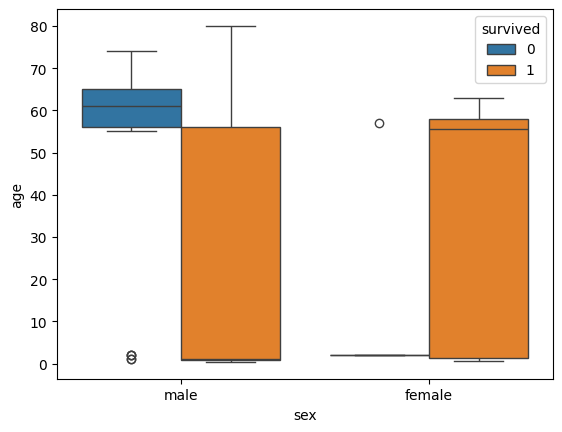

In [39]:
sns.boxplot(x='sex', y='age', data=outliers, hue="survived")

<Axes: xlabel='sex', ylabel='age'>

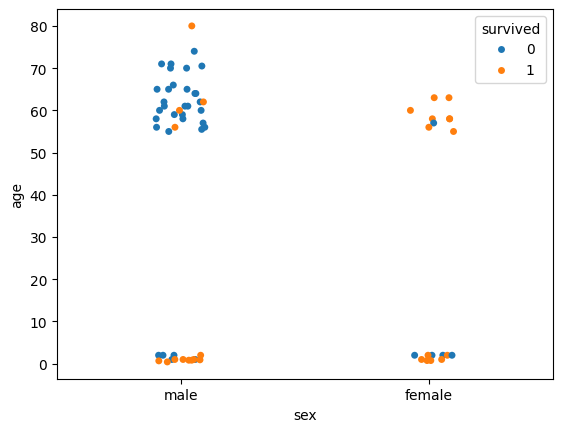

In [33]:
sns.stripplot(x='sex', y='age', data=outliers, jitter=True, hue='survived')

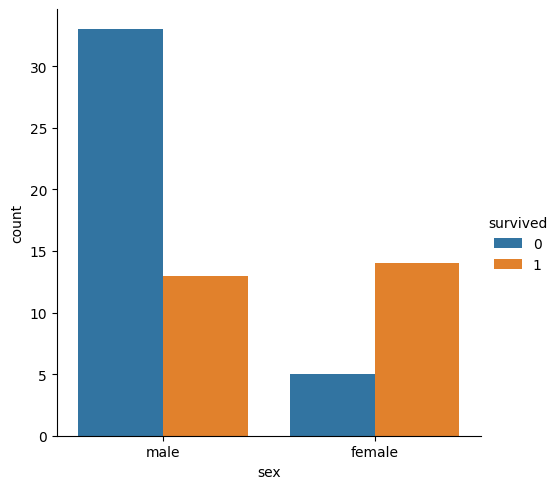

In [35]:
sns.catplot(x = "sex", hue= "survived", kind= "count", data=outliers)

<Axes: xlabel='sex', ylabel='age'>

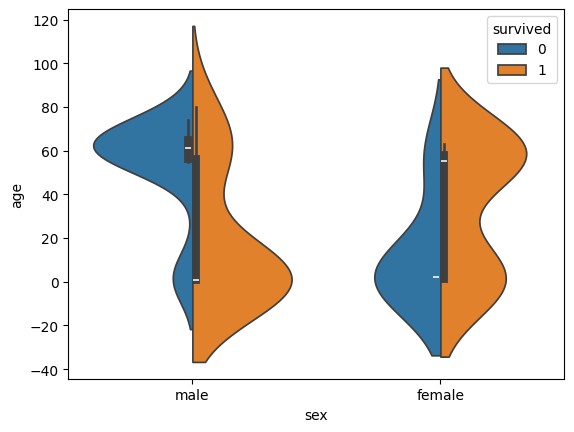

In [36]:
sns.violinplot(x = "sex", y = "age", hue = "survived", data = outliers, split = True)

In [43]:
Q1 = data['age'].quantile(0.25)
Q3 = data['age'].quantile(0.75)
IQR = Q3 - Q1
within_range = data[~((data['age'] < (Q1 - 1.5 * IQR)) | (data['age'] > (Q3 + 1.5 * IQR)))]
within_range

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,C,Southampton,no,False
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,C,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,C,Southampton,no,True
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,29.699118,1,2,23.4500,S,Third,woman,False,B,Southampton,no,False
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


<Axes: xlabel='sex', ylabel='age'>

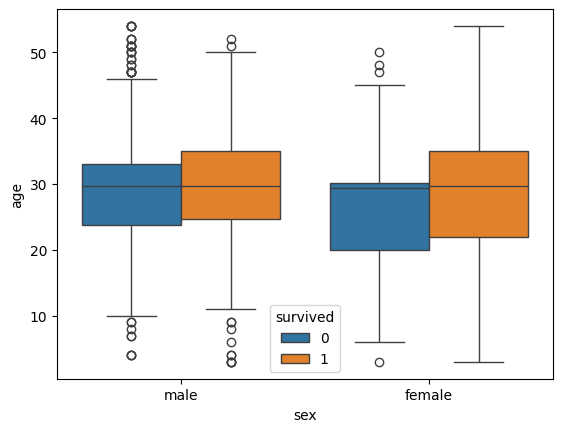

In [44]:
sns.boxplot(x='sex', y='age', data=within_range, hue="survived")

<Axes: xlabel='sex', ylabel='age'>

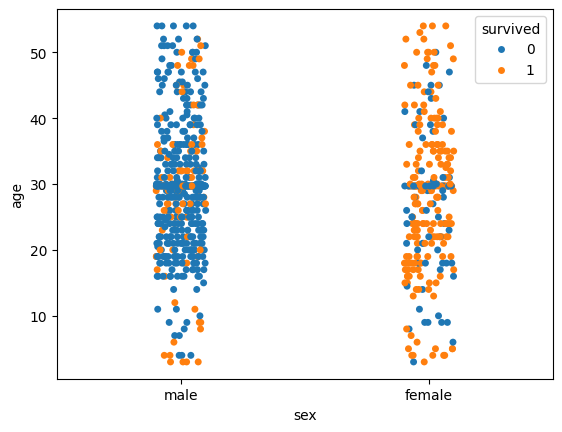

In [45]:
sns.stripplot(x='sex', y='age', data=within_range, jitter=True, hue='survived')

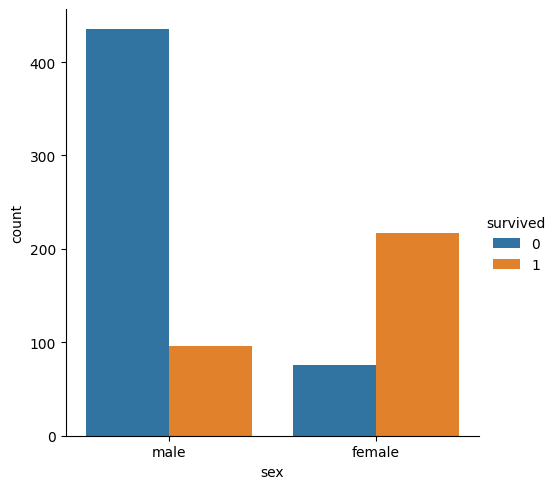

In [46]:
sns.catplot(x = "sex", hue= "survived", kind= "count", data=within_range)

<Axes: xlabel='sex', ylabel='age'>

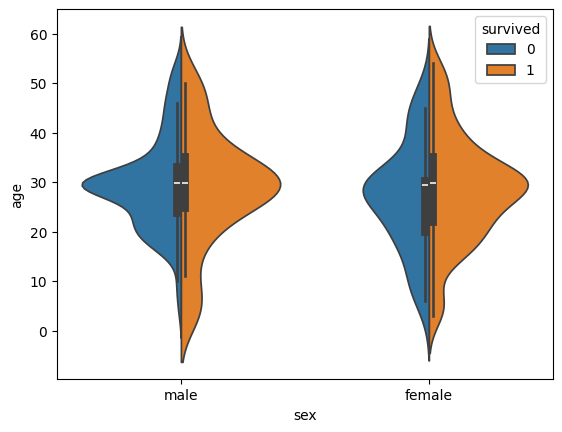

In [47]:
sns.violinplot(x = "sex", y = "age", hue = "survived", data = within_range, split = True)